In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import scipy
from scipy import integrate, interpolate, misc
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sys
import os

In [4]:
sys.path.append("/home/chase/codes/python_functions/")
import plotting as my_plot

sys.path.append(os.path.realpath('./pyilt/'))
import ilt

import my_dls_code as dls

sys.path.append("./previous/lcurve-master/")
import lcurve_functions as lcurve_fun

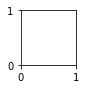

In [5]:
fig, ax = my_plot.instantiate_fig(1, 1)

In [39]:
data_set_number = 5

data_folder = f'./data/data_{data_set_number}/'
images_folder = f'./images_real_time/images_{data_set_number}/'
try:
    os.mkdir(images_folder)
except:
    pass

files = os.listdir(data_folder)
files.remove('notes.txt')
files

['pafvin-s-250-3.dat',
 'pafvin-m-750.dat',
 'hccf-lmw1-unk.dat',
 'pafvin-s-0500-2.dat',
 'pafvin-s-0500.dat']

In [40]:
data = {}
for f in files:
    data[f] = dls.data_file(f'{data_folder}/{f}')

In [41]:
# Descriptive plots

for f in files:
    fig, ax = data[f].make_count_rate_plot()
    plt.savefig(f'./{images_folder}/{data[f].name}_1_count_rate.png', 
                dpi=300, bbox_inches='tight')
    
    fig, ax = data[f].make_count_rate_histogram()
    plt.savefig(f'./{images_folder}/{data[f].name}_2_count_rate_hist.png', 
                dpi=300, bbox_inches='tight')
    
    fig, ax = data[f].make_g2_plot()
    plt.savefig(f'./{images_folder}/{data[f].name}_3_g2.png', 
                dpi=300, bbox_inches='tight')
    
    plt.close('all')

In [42]:
for f in files:
    data[f].get_optimal_alpha(low_r_bound=0.5, up_r_bound=1000)

In [43]:
for f in files:
    fig, ax = data[f].draw_L_curve()
    plt.savefig(f'./{images_folder}/{data[f].name}_4_L_curve.png', 
                dpi=300, bbox_inches='tight')
    
    fig, ax = data[f].plot_g1_fit()
    plt.savefig(f'./{images_folder}/{data[f].name}_5_g1_fit.png', 
                dpi=300, bbox_inches='tight')

    fig, ax = data[f].make_gamma_dist_plot()
    plt.savefig(f'./{images_folder}/{data[f].name}_6_G_gamma_dist.png', 
                dpi=300, bbox_inches='tight')
    
    fig, ax = data[f].make_rh_dist_plot()
    plt.savefig(f'./{images_folder}/{data[f].name}_7_Rh_dist.png', 
                dpi=300, bbox_inches='tight')
                
    plt.close('all')